In [1]:
basedir=r'./ADE/images/training'

In [2]:
from os import listdir
from os.path import isfile, join,isdir
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [3]:
from pathlib import Path
result = list(Path(basedir).rglob("*.[tT][xX][tT]"))

In [4]:
print(len(result),result[0:5])

20210 [WindowsPath('ADE/images/training/a/abbey/ADE_train_00000970_atr.txt'), WindowsPath('ADE/images/training/a/abbey/ADE_train_00000971_atr.txt'), WindowsPath('ADE/images/training/a/abbey/ADE_train_00000972_atr.txt'), WindowsPath('ADE/images/training/a/abbey/ADE_train_00000973_atr.txt'), WindowsPath('ADE/images/training/a/abbey/ADE_train_00000974_atr.txt')]


In [5]:
def is_include_floor(txtfilepath):
    with open(txtfilepath) as f:
        if 'floor' in f.read():
            return True

In [16]:
i=0
floorfiles=[]
for txtp in result :

    if is_include_floor(txtp):
        i+=1
        print(txtp)
        floorfiles.append(txtp)
    if i>10:
        break
  

ADE\images\training\a\abbey\ADE_train_00000975_atr.txt
ADE\images\training\a\airlock\ADE_train_00001040_atr.txt
ADE\images\training\a\airlock\ADE_train_00001041_atr.txt
ADE\images\training\a\airlock\ADE_train_00001042_atr.txt
ADE\images\training\a\airlock\ADE_train_00001043_atr.txt
ADE\images\training\a\airlock\ADE_train_00001044_atr.txt
ADE\images\training\a\airlock\ADE_train_00001045_atr.txt
ADE\images\training\a\airlock\ADE_train_00001046_atr.txt
ADE\images\training\a\airlock\ADE_train_00001047_atr.txt
ADE\images\training\a\airlock\ADE_train_00001048_atr.txt
ADE\images\training\a\airplane_cabin\ADE_train_00001049_atr.txt


In [26]:
def get_img_seg_path(txtfilepath):
    head,tail=os.path.split(txtfilepath)
    img=tail.replace('_atr.txt','.jpg')
    seg=tail.replace('_atr.txt','_seg.png')
    img=os.path.join(head,img)
    seg=os.path.join(head,seg)
    return img,seg


In [46]:
f=floorfiles[3]
print(f)
img,seg=get_img_seg_path(f)
print(img,seg)

ADE\images\training\a\airlock\ADE_train_00001042_atr.txt
ADE\images\training\a\airlock\ADE_train_00001042.jpg ADE\images\training\a\airlock\ADE_train_00001042_seg.png


In [47]:
fileObject = open(f, "r")
data = fileObject.read()
print(data)

001 # 0 # 0 # wall # wall # ""
002 # 0 # 0 # wall # wall # ""
003 # 0 # 0 # wall # wall # ""
004 # 0 # 0 # wall # wall # ""
005 # 0 # 0 # floor, flooring # floor # ""
006 # 0 # 0 # ceiling # ceiling # ""
007 # 0 # 0 # windowpane, window # window # ""



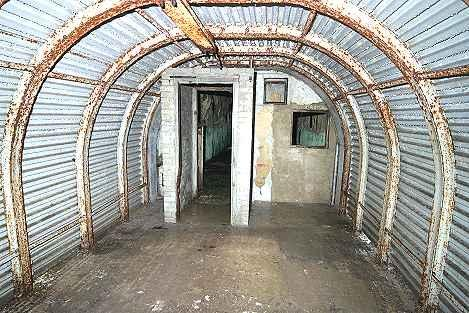

In [48]:
img=Image.open(img)
img

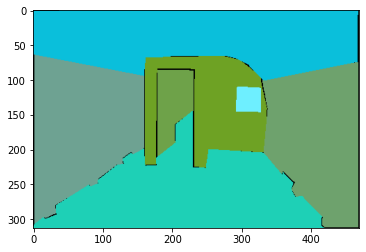

In [49]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
segdata=np.array(Image.open(seg))
plt.imshow(segdata)

In [50]:
classes=np.unique(segdata)
classes

array([  0,  10,  30,  36,  73, 109, 110, 146, 162, 182, 191, 208, 219,
       239, 255], dtype=uint8)

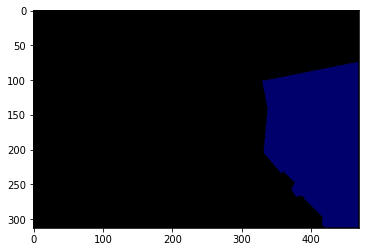

In [51]:
segone=segdata.copy()
segone[segone!=classes[5]]=0
plt.imshow(segone)

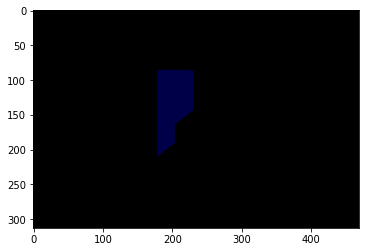

In [52]:
segone=segdata.copy()
segone[segone!=classes[4]]=0
plt.imshow(segone)

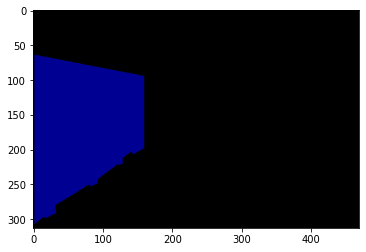

In [53]:
segone=segdata.copy()
segone[segone!=classes[7]]=0
plt.imshow(segone)

In [9]:
dstimg=r'./FloorData/Images'
dstmsk=r'./FloorData/Masks'


In [11]:
from shutil import copyfile
def copy_file(srcpath,dstfilename):
    dstimg=r'./FloorData/Images'
    dstmsk=r'./FloorData/Masks'
    dstfile=os.path.join(dstimg,dstfilename)
    copyfile(img,dstfile)



In [12]:
dstfile=os.path.join(dstimg,'1.jpg')
copyfile(img,dstfile)

'./FloorData/Images\\1.jpg'

In [14]:
np.array(segdata)

array([[[ 90, 116,  28],
        [ 90, 116,  28],
        [ 90, 116,  28],
        ...,
        [ 90, 116,  28],
        [ 90, 116,  28],
        [  0,   0,   0]],

       [[ 90, 116,  28],
        [ 90, 116,  28],
        [ 90, 116,  28],
        ...,
        [ 90, 116,  28],
        [ 90, 116,  28],
        [  0,   0,   0]],

       [[ 90, 116,  28],
        [ 90, 116,  28],
        [ 90, 116,  28],
        ...,
        [ 90, 116,  28],
        [ 90, 116,  28],
        [  0,   0,   0]],

       ...,

       [[ 40, 101, 198],
        [ 40, 101, 198],
        [ 40, 101, 198],
        ...,
        [ 40, 101, 198],
        [ 40, 101, 198],
        [  0,   0,   0]],

       [[ 40, 101, 198],
        [ 40, 101, 198],
        [ 40, 101, 198],
        ...,
        [ 40, 101, 198],
        [ 40, 101, 198],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 40, 101, 198],
        [ 40, 101, 198],
        [  0,   0,   0]]

In [15]:
np.unique(segdata)

array([  0,  10,  28,  30,  39,  40,  56,  57,  85,  90, 101, 110, 113,
       116, 142, 170, 198, 227, 255], dtype=uint8)